In [1]:
# Step 1:Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Step2 : Importing the dataset (dataset is in text file and converting dataset into csv and stored in dataframe)
df = pd.read_csv("G:/HOUSEHOLD DATASETS/household_power_consumption.txt", sep = ";")


In [3]:
# Step 3: Display basic information about the dataset

# This will show number of rows, columns, data types, and non-null counts
print("Dataset Info:\n")
df.info()

# Display the first 5 rows of the dataset to understand how the data looks
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB

First 5 rows of the dataset:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  

In [4]:
# Step 4: Convert necessary columns to numeric and handle missing values

# Replacing all '?' strings with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

# Convert applicable columns to numeric
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert strings to numbers, force errors to NaN

# Combine 'Date' and 'Time' into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns since they're now merged
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Reorder columns so 'Datetime' comes first
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

# Show the updated info
print("\nUpdated Dataset Info after Conversion:\n")
print(df.info())

# Display first 5 rows of cleaned data
print("\nCleaned Data Preview:")
print(df.head())



Updated Dataset Info after Conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None

Cleaned Data Preview:
             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:

In [5]:
# Step 5: Handling Missing Values

# Checking total missing values in each column
print("\nMissing values in each column (after conversion):")
print(df.isnull().sum())

# Checking how many total rows have at least one missing value
print("\nTotal rows with any missing values:")
print(df.isnull().any(axis=1).sum())

# Calculating the percentage of rows with missing values
missing_percentage = df.isnull().any(axis=1).mean() * 100
print(f"\nPercentage of rows with missing values: {missing_percentage:.2f}%")

# If the percentage is low (say <5%), we can safely drop them
if missing_percentage < 5:
    df.dropna(inplace=True)
    print("\nRows with missing values dropped.")
else:
    print("\nToo many missing values. Consider imputing instead.")

# Final shape after cleaning
print("\nFinal dataset shape:", df.shape)



Missing values in each column (after conversion):
Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Total rows with any missing values:
25979

Percentage of rows with missing values: 1.25%

Rows with missing values dropped.

Final dataset shape: (2049280, 8)


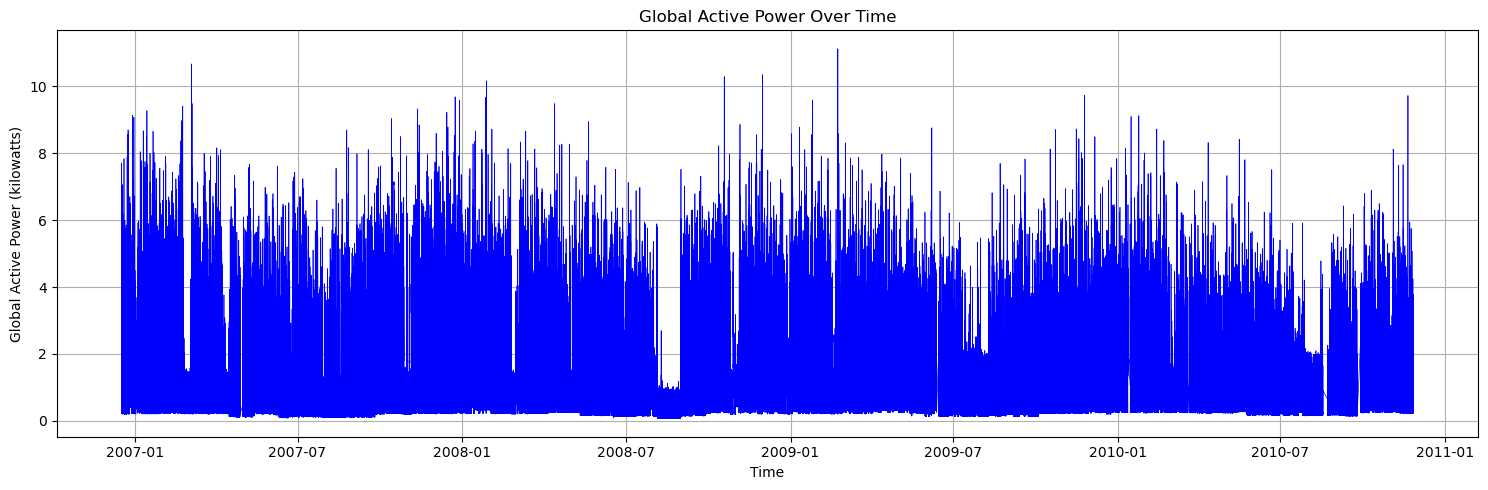

In [6]:
# Step 6: Exploratory Data Analysis (EDA)

# 1. Line Plot: Global Active Power vs. Time
plt.figure(figsize=(15, 5))  # Set the graph size
plt.plot(df['Datetime'], df['Global_active_power'], color='blue', linewidth=0.5)
plt.title('Global Active Power Over Time')  # Title of the graph
plt.xlabel('Time')  # X-axis label
plt.ylabel('Global Active Power (kilowatts)')  # Y-axis label
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# This line plot shows the variation of Global Active Power consumption over time.
# We observe recurring peaks and drops, suggesting daily usage patterns.
# Some sharp dips to zero might indicate missing readings, power outages, or times of low activity.
# This plot helps us visually identify periods of high and low consumption and seasonality in power usage.


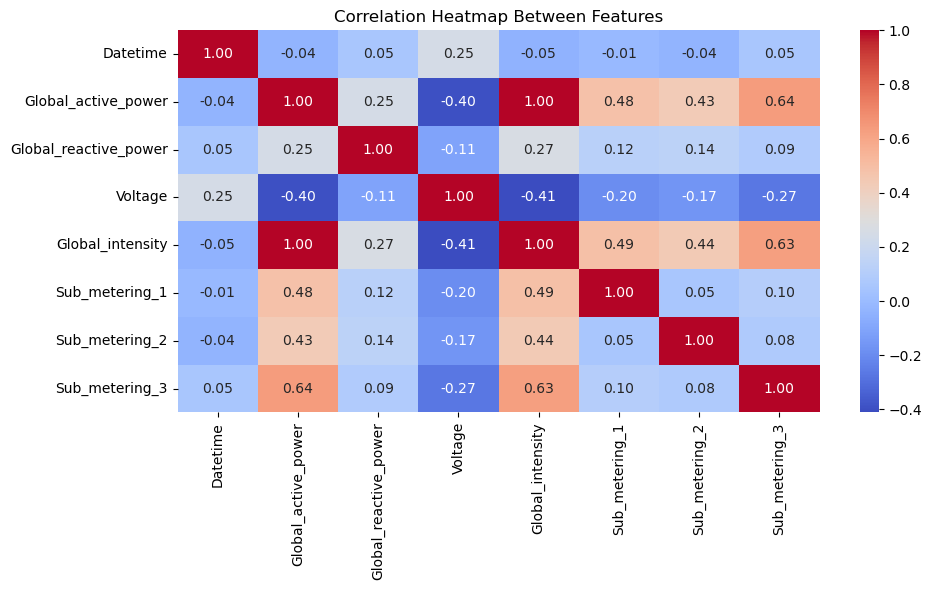

In [7]:
# Step 6.2: Correlation Heatmap

# Set the plot size
plt.figure(figsize=(10, 6))

# Create the heatmap using Seaborn
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Title of the heatmap
plt.title("Correlation Heatmap Between Features")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# This heatmap displays the correlation between all numerical features.
# A value close to +1 indicates a strong positive relationship; -1 indicates a strong negative one.
# We can see that 'Global_intensity' has a perfect correlation with 'Global_active_power' (1.00),
# which makes sense because it is mathematically related.
# Sub_metering values also show moderate correlation with the target, which supports using them in the model.
# This helps in selecting the most important features for prediction.


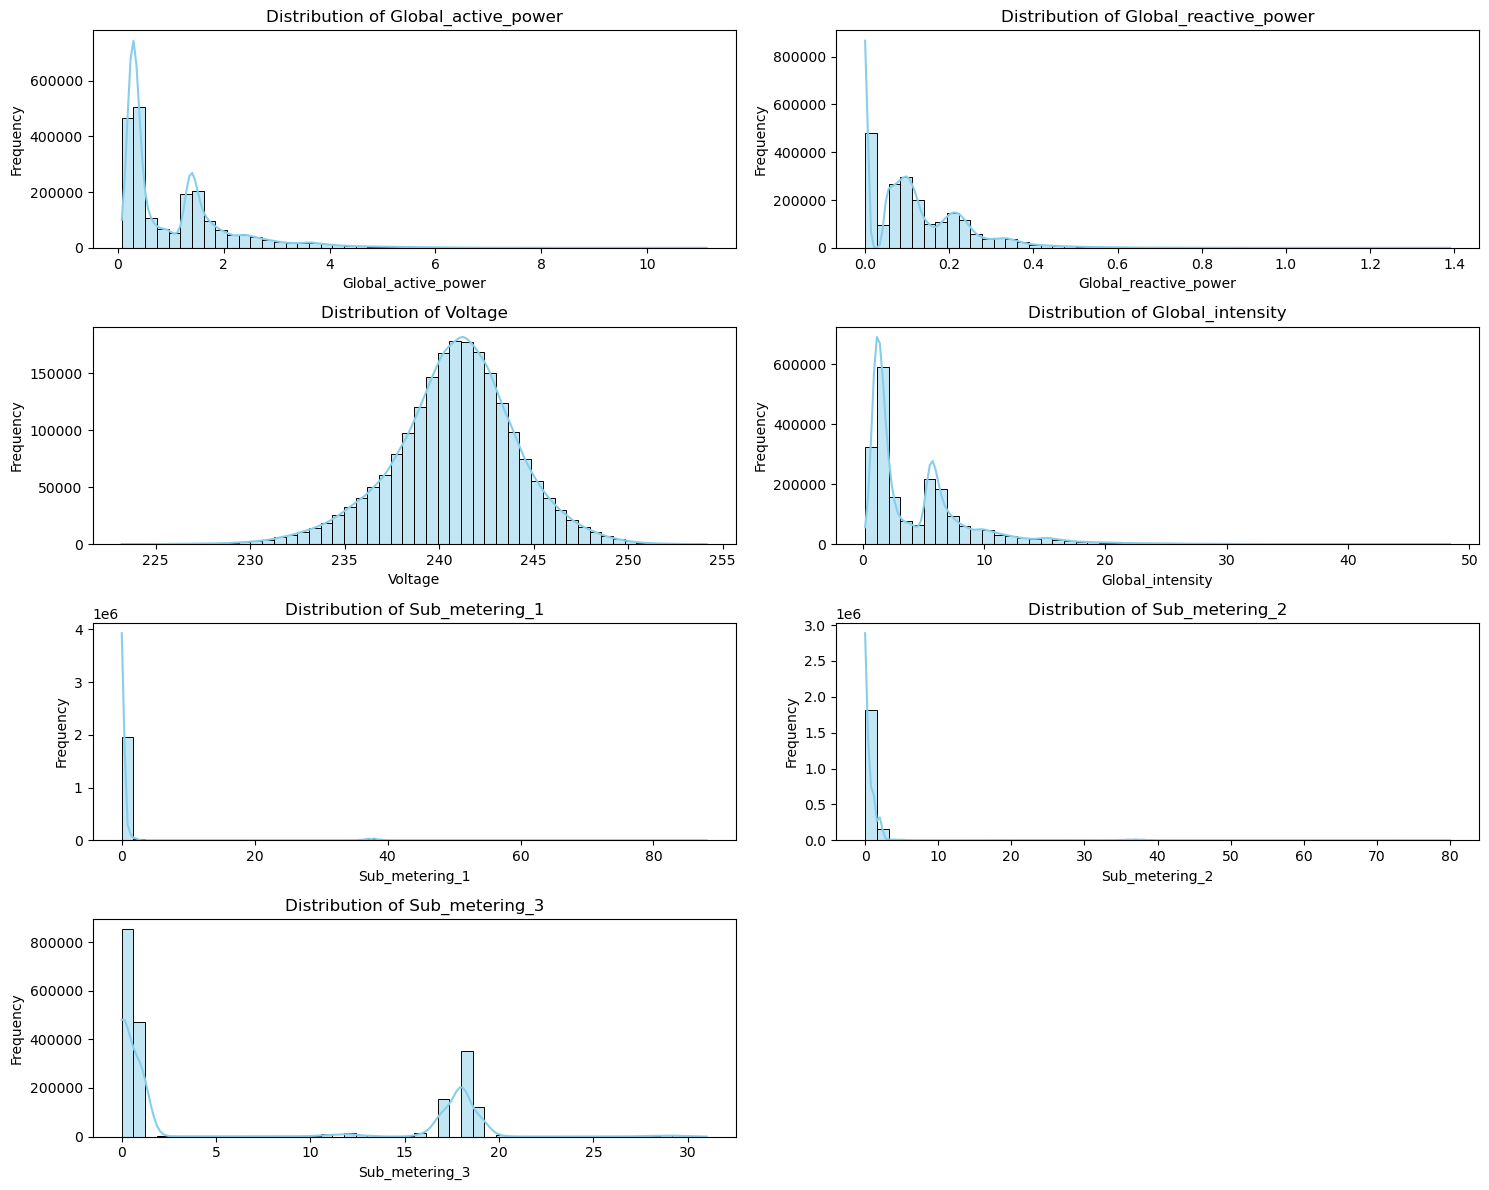

In [8]:
# Step 6.3: Distribution Plots for Key Numerical Features

# List of selected features to plot
important_columns = ['Global_active_power', 'Global_reactive_power',
                     'Voltage', 'Global_intensity',
                     'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a grid of plots
plt.figure(figsize=(15, 12))  # Set figure size

# Loop through each column and create a distribution plot
for i, column in enumerate(important_columns, 1):
    plt.subplot(4, 2, i)  # 4 rows x 2 columns layout
    sns.histplot(df[column], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Prevent overlap
plt.show()


In [ ]:
# These histograms show how values are distributed for each numeric feature.

# Global_active_power: Right-skewed distribution showing that most power usage is under 2 kW, with fewer high-usage peaks.
# Global_reactive_power: Mostly small values, indicating limited reactive power usage (common in residential settings).
# Voltage: Appears normally distributed, centered around 240V, indicating a stable voltage supply.
# Global_intensity: Right-skewed, similar to active power—high usage is rare.
# Sub_metering_1, 2: Highly zero-inflated—appliances in these categories are not frequently used.
# Sub_metering_3: Shows two peaks—indicating devices like heaters or ACs operating at specific modes or intervals.

# These insights help us to understand energy usage behavior and the spread of values.


In [9]:
# Step 7: Feature Engineering - Creating useful new columns

# Extracting year, month, day, hour, and weekday from the Datetime column
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.day_name()

# Create a new column to indicate whether it's a weekend
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Create a feature for total submetering usage
df['Total_Submeter'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Calculate unmetered power: total power - sub-metered
# Global active power is in kilowatts → 1 kW = 1000 W, measured over 1 minute → multiply by (1000 / 60) to convert to watt-minutes
df['Unmetered_power'] = (df['Global_active_power'] * 1000 / 60) - df['Total_Submeter']

# Show the first 5 rows to confirm
print("\nPreview of data after feature engineering:")
print(df[['Datetime', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Is_Weekend', 'Total_Submeter', 'Unmetered_power']].head())



Preview of data after feature engineering:
             Datetime  Year  Month  Day  Hour   Weekday  Is_Weekend  \
0 2006-12-16 17:24:00  2006     12   16    17  Saturday           1   
1 2006-12-16 17:25:00  2006     12   16    17  Saturday           1   
2 2006-12-16 17:26:00  2006     12   16    17  Saturday           1   
3 2006-12-16 17:27:00  2006     12   16    17  Saturday           1   
4 2006-12-16 17:28:00  2006     12   16    17  Saturday           1   

   Total_Submeter  Unmetered_power  
0            18.0        52.266667  
1            17.0        72.333333  
2            19.0        70.566667  
3            18.0        71.800000  
4            18.0        43.100000  


In [12]:
# Step 8 (Fixed): Train the model without using Unmetered_power

# Updated feature list WITHOUT leakage
features = ['Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Hour', 'Is_Weekend']

target = 'Global_active_power'

# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Root Mean Squared Error (RMSE): 0.0403
Mean Absolute Error (MAE): 0.0258
R² Score: 0.9986


In [ ]:
#Conclusion:
# “This model served as a strong baseline with an R² of 0.9986. 
#However, it assumes a linear relationship, which limits its flexibility for modeling complex energy patterns.”

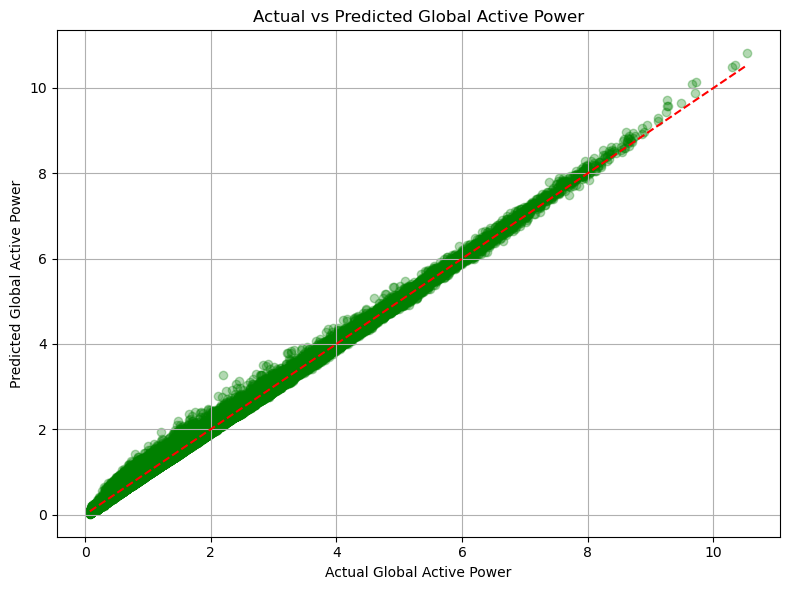

In [13]:
# Step 9: Visualize Actual vs Predicted values using a Scatter Plot

plt.figure(figsize=(8, 6))  # Set figure size

# Create scatter plot: X = actual values, Y = predicted values
plt.scatter(y_test, y_pred, alpha=0.3, color='green')

# Plot reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Global Active Power")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# This scatter plot compares the actual Global Active Power values (X-axis) against the predicted values (Y-axis).
# The red diagonal line represents a perfect prediction line (where prediction = actual).
# Since most points are clustered close to this line, it indicates that the model's predictions are highly accurate.
# Deviations from the line indicate areas where the model slightly underpredicts or overpredicts.
# This plot is crucial to visually confirm the model's performance.


In [14]:
# Step 10: Train Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print results
print("Random Forest Model Performance:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")


Random Forest Model Performance:
RMSE: 0.0289
MAE: 0.0160
R² Score: 0.9993


In [ ]:
#Conclusion:
# “Random Forest performed better than Linear Regression. It reduced prediction errors (lower RMSE and MAE) and achieved a higher R² score.
#This model handled the dataset’s non-linear patterns more effectively using its ensemble tree-based approach.”

In [15]:
# Step 11: Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on test data
gbr_pred = gbr_model.predict(X_test)

# Evaluate the model
gbr_rmse = mean_squared_error(y_test, gbr_pred, squared=False)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

# Print results
print("Gradient Boosting Model Performance:")
print(f"RMSE: {gbr_rmse:.4f}")
print(f"MAE: {gbr_mae:.4f}")
print(f"R² Score: {gbr_r2:.4f}")


Gradient Boosting Model Performance:
RMSE: 0.0341
MAE: 0.0214
R² Score: 0.9990


In [ ]:
#Conclusions:
# “Gradient Boosting also performed well and was very close to Random Forest. It builds sequential models and works well for datasets with complex patterns. 
#Though slightly less accurate than Random Forest here, it’s still a strong alternative.”

In [ ]:
# Final Verdict:
# “Random Forest performed best overall, with the lowest RMSE and MAE. 
#It captured non-linear relationships and provided highly accurate predictions without any manual tuning.
#This makes it the best choice for this dataset.”

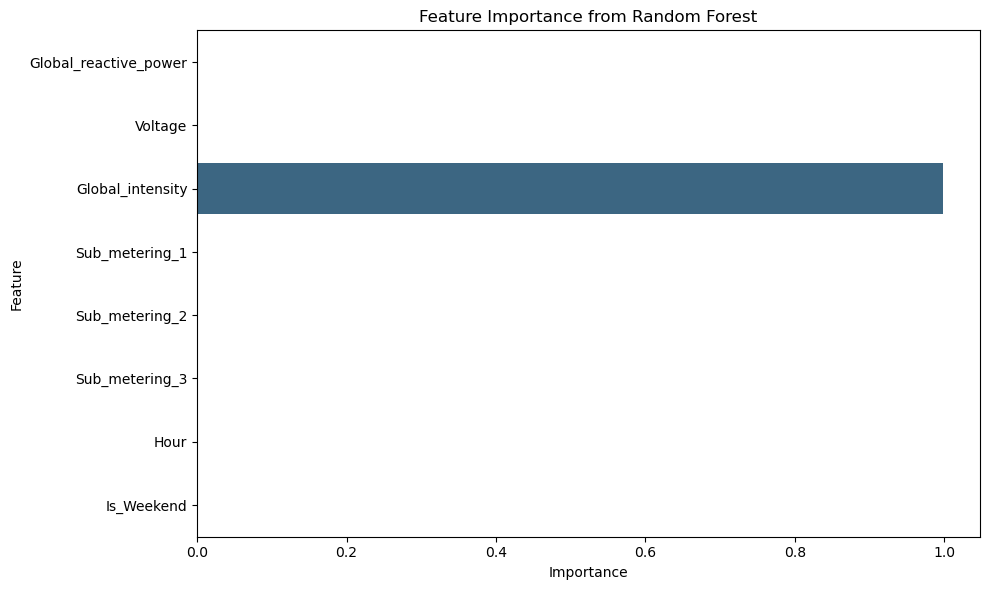

In [16]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
features_list = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features_list, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# This bar plot shows how much each feature contributed to the model's predictions.
# 'Global_intensity' has the highest importance (~100%), which aligns with its perfect correlation to 'Global_active_power'.
# The other features have little to no influence in this specific model run.
# This graph helps identify which features the Random Forest model relied on most.
# However, we must be cautious—high importance of one feature may overshadow others, so understanding relationships is key.
